# FOR FINAL LIST OF RESULT , SCORLL ALL THE WAY DOWN

In [1]:
import os, re
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt


# CURRENT DIRECTORY (PLACE SCRIPT IN /home/mydirectory)
cd = os.getcwd()

In [2]:
fileNames=[]
reviewRegex = re.compile(r'newest_rev(ie|ei)ws')

In [3]:
i = 0
columns = range(1,100)
dfList = []

for root, dirs, files in os.walk(cd):
    for fname in files:
        if reviewRegex.search(fname):
            frame = pd.read_csv(os.path.join(root, fname), names=columns,skiprows=1)
            if fname.find("EDUCATION") != -1:
                frame['CATEGORY'] = "EDUCATION"
            elif fname.find("FINANCE") !=-1:
                frame['CATEGORY'] = "FINANCE"  
            elif fname.find("ENTERTAINMENT") != -1:
                frame['CATEGORY'] = "ENTERTAINMENT"
            elif fname.find("FAMILY") != -1:
                frame['CATEGORY'] = "FAMILY"
            elif fname.find("GAME") != -1:
                frame['CATEGORY'] = "GAME-ACTION"
            elif fname.find("HEALTH") != -1:
                frame['CATEGORY'] = "HEALTH AND FITNESS"
            elif fname.find("LIFESTYLE") != -1:
                frame['CATEGORY'] = "LIFESTYLE"
            elif fname.find("MUSIC") != -1:
                frame['CATEGORY'] = "MUSIC AND AUDIO"
            
            #frame['key'] = "file{}".format(i)
            dfList.append(frame)    
            fileNames.append(fname)
            i += 1


In [4]:
detailsRegex = re.compile(r'_all_detailed')
i = 0
columns = range(1,100)
detailsFiles=[]
detailsList=[]



for root, dirs, files in os.walk(cd):
    for fname in files:
        if detailsRegex.search(fname):
            frame = pd.read_csv(os.path.join(root, fname), names=columns,skiprows=0)
            if fname.find("EDUCATION") != -1:
                frame['CATEGORY'] = "EDUCATION"
            elif fname.find("FINANCE") !=-1:
                frame['CATEGORY'] = "FINANCE"  
            elif fname.find("ENTERTAINMENT") != -1:
                frame['CATEGORY'] = "ENTERTAINMENT"
            elif fname.find("FAMILY") != -1:
                frame['CATEGORY'] = "FAMILY"
            elif fname.find("GAME") != -1:
                frame['CATEGORY'] = "GAME-ACTION"
            elif fname.find("HEALTH") != -1:
                frame['CATEGORY'] = "HEALTH AND FITNESS"
            elif fname.find("LIFESTYLE") != -1:
                frame['CATEGORY'] = "LIFESTYLE"
            elif fname.find("MUSIC") != -1:
                frame['CATEGORY'] = "MUSIC AND AUDIO"
            
            #frame['key'] = "file{}".format(i)
            detailsList.append(frame)    
            detailsFiles.append(fname)
            i += 1
            
            


##### ALL detailed dataset analysis

In [5]:
len(detailsList)

64

In [10]:
detailsDf = pd.concat(detailsList)

In [11]:
detailsDf
detailsDf.columns = detailsDf.iloc[0]
pd.set_option('display.max_columns', 30)
detailsDf.dropna(axis=1,how="all",inplace=True)
#msno.matrix(detailsDf)
detailsDf.tail()
detailsDf = detailsDf.loc[:, detailsDf.columns.notnull()]
detailsDf.reset_index(drop=True,inplace=True)
detailsDf.drop(index=0,inplace=True)
detailsDf.appTitle = detailsDf.appTitle.str.lower()


In [12]:
detailsDf.drop_duplicates(subset=['appTitle','summary','installs','minInstalls','score','ratings','reviews','free','offersIAP','size','androidVersionText','developerId','genreId','familyGenreId','contentRating'],inplace=True)
detailsDf.drop(index=527,inplace=True)
detailsDf.rename(columns={"EDUCATION":"CATEGORY"},inplace=True)
detailsDf['reviews'] = pd.to_numeric(detailsDf['reviews'], errors='coerce')
detailsDf.contentRating.unique()
detailsDf


,appTitle,summary,installs,minInstalls,score,ratings,reviews,free,offersIAP,size,androidVersionText,developerId,genreId,familyGenreId,contentRating,adSupported,released,updated,version,recentChanges,appId,url,CATEGORY
1,duolingo: learn languages free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.7198496,7258463,2788387.0,true,true,Varies with device,Varies with device,6957685454452609502,EDUCATION,FAMILY_EDUCATION,Everyone,true,"May 29, 2013",1551998991000,Varies with device,"Our mascot owl, Duo, is trading in his usual d...",com.duolingo,https://play.google.com/store/apps/details?id=...,EDUCATION
2,photomath,Scan. Solve. Learn.,"50,000,000+",50000000,4.689265,1033063,385731.0,true,false,Varies with device,Varies with device,8492011720422545772,EDUCATION,NaN,Everyone,false,"Feb 26, 2015",1545376427000,Varies with device,Bug fixes and performance enhancements for smo...,com.microblink.photomath,https://play.google.com/store/apps/details?id=...,EDUCATION
3,remind: school communication,School Communication,"10,000,000+",10000000,4.4903703,139258,45845.0,true,false,22M,4.4 and up,Remind101,EDUCATION,NaN,Everyone,false,"Oct 5, 2012",1551835573000,9.16.2.33150,"To make your Remind experience great, we updat...",com.remind101,https://play.google.com/store/apps/details?id=...,EDUCATION
4,kahoot!,"Create and play quizzes on the go, have fun an...","10,000,000+",10000000,4.2366056,59838,18498.0,true,true,Varies with device,Varies with device,5643238107618943124,EDUCATION,FAMILY_EDUCATION,Everyone,false,"Nov 1, 2012",1551194923000,Varies with device,This update is mostly about bug fixing and imp...,no.mobitroll.kahoot.android,https://play.google.com/store/apps/details?id=...,EDUCATION
5,google classroom,Connect with your classes and do assignments o...,"10,000,000+",10000000,4.230005,87020,22630.0,true,false,Varies with device,Varies with device,5700313618786177705,EDUCATION,NaN,Everyone,false,"Jan 14, 2015",1550592218000,Varies with device,We&#39;re making classes even more flexible fo...,com.google.android.apps.classroom,https://play.google.com/store/apps/details?id=...,EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,"iheartradio - free music, radio & podcasts",com.clearchannel.iheartradio.controller,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/w-uA-J1kngql...,"iHeartMedia, Inc.",8821283674927730745,NaN,true,Your Music. Your Stations. Your Podcasts. All ...,4.7,"4.6609664""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
697,amazon music,com.amazon.mp3,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/c0uMGe9aLRQx...,Amazon Mobile LLC,Amazon Mobile LLC,NaN,true,Find and play music you love – get the free Am...,4.3,"4.323581""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
698,amazon alexa,com.amazon.dee.app,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/TrGtH5xYMUuy...,Amazon Mobile LLC,Amazon Mobile LLC,NaN,true,"ALWAYS READY, CONNECTED, AND FAST. Just ask.",3.4,"3.4326818""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
699,apple music,com.apple.android.music,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/-E-jAfuwURMb...,Apple Inc.,Apple Inc.,NaN,true,50 million songs. All ad-free.,3.5,"3.4576716""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO


In [13]:
detailsDf

,appTitle,summary,installs,minInstalls,score,ratings,reviews,free,offersIAP,size,androidVersionText,developerId,genreId,familyGenreId,contentRating,adSupported,released,updated,version,recentChanges,appId,url,CATEGORY
1,duolingo: learn languages free,"Learn English, Spanish, French, German, Italia...","100,000,000+",100000000,4.7198496,7258463,2788387.0,true,true,Varies with device,Varies with device,6957685454452609502,EDUCATION,FAMILY_EDUCATION,Everyone,true,"May 29, 2013",1551998991000,Varies with device,"Our mascot owl, Duo, is trading in his usual d...",com.duolingo,https://play.google.com/store/apps/details?id=...,EDUCATION
2,photomath,Scan. Solve. Learn.,"50,000,000+",50000000,4.689265,1033063,385731.0,true,false,Varies with device,Varies with device,8492011720422545772,EDUCATION,NaN,Everyone,false,"Feb 26, 2015",1545376427000,Varies with device,Bug fixes and performance enhancements for smo...,com.microblink.photomath,https://play.google.com/store/apps/details?id=...,EDUCATION
3,remind: school communication,School Communication,"10,000,000+",10000000,4.4903703,139258,45845.0,true,false,22M,4.4 and up,Remind101,EDUCATION,NaN,Everyone,false,"Oct 5, 2012",1551835573000,9.16.2.33150,"To make your Remind experience great, we updat...",com.remind101,https://play.google.com/store/apps/details?id=...,EDUCATION
4,kahoot!,"Create and play quizzes on the go, have fun an...","10,000,000+",10000000,4.2366056,59838,18498.0,true,true,Varies with device,Varies with device,5643238107618943124,EDUCATION,FAMILY_EDUCATION,Everyone,false,"Nov 1, 2012",1551194923000,Varies with device,This update is mostly about bug fixing and imp...,no.mobitroll.kahoot.android,https://play.google.com/store/apps/details?id=...,EDUCATION
5,google classroom,Connect with your classes and do assignments o...,"10,000,000+",10000000,4.230005,87020,22630.0,true,false,Varies with device,Varies with device,5700313618786177705,EDUCATION,NaN,Everyone,false,"Jan 14, 2015",1550592218000,Varies with device,We&#39;re making classes even more flexible fo...,com.google.android.apps.classroom,https://play.google.com/store/apps/details?id=...,EDUCATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,"iheartradio - free music, radio & podcasts",com.clearchannel.iheartradio.controller,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/w-uA-J1kngql...,"iHeartMedia, Inc.",8821283674927730745,NaN,true,Your Music. Your Stations. Your Podcasts. All ...,4.7,"4.6609664""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
697,amazon music,com.amazon.mp3,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/c0uMGe9aLRQx...,Amazon Mobile LLC,Amazon Mobile LLC,NaN,true,Find and play music you love – get the free Am...,4.3,"4.323581""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
698,amazon alexa,com.amazon.dee.app,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/TrGtH5xYMUuy...,Amazon Mobile LLC,Amazon Mobile LLC,NaN,true,"ALWAYS READY, CONNECTED, AND FAST. Just ask.",3.4,"3.4326818""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO
699,apple music,com.apple.android.music,https://play.google.com/store/apps/details?id=...,https://lh3.googleusercontent.com/-E-jAfuwURMb...,Apple Inc.,Apple Inc.,NaN,true,50 million songs. All ad-free.,3.5,"3.4576716""title""",appId,url,icon,developer,developerId,priceText,free,summary,scoreText,score,NaN,MUSIC AND AUDIO


###### Content Rating groups in each of the eight categories and their number 

In [16]:
detailsDf.contentRating.unique()
pd.DataFrame(detailsDf.groupby("CATEGORY")["contentRating"].unique())
detailsDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone         60
                    developer        18
ENTERTAINMENT       Everyone          6
                    Mature 17+        6
                    Teen             48
                    developer        18
FAMILY              Everyone         40
                    Everyone 10+     18
                    developer        18
FINANCE             Everyone         60
                    contentRating     1
                    developer        18
GAME-ACTION         Everyone         30
                    Mature 17+        6
                    Teen             24
                    developer        18
HEALTH AND FITNESS  Everyone         60
                    developer        18
LIFESTYLE           Everyone         52
                    Mature 17+        6
                    Teen              1
                    developer        16
MUSIC AND AUDIO     Everyone         12
                    Teen             48
      

*******

#### Reviews Analysis

In [19]:
len(fileNames)

64

In [22]:
df = pd.concat(dfList)
df.reset_index(drop=True,inplace=True)
df.rename(columns={1:"appTitle",2:"userName",3:"date",4:"score",5:"text"},inplace=True)
df.dropna(axis=1,how="all",inplace=True)
df['appTitle'] = df['appTitle'].str.lower()





#### Reviews Data set after reading each CSV and attaching category as additional column

In [23]:
df

,appTitle,userName,date,score,text,CATEGORY
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION
...,...,...,...,...,...,...
2715298,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO
2715299,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO
2715300,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO
2715301,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO


In [38]:
df.tail()

,appTitle,userName,date,score,text,CATEGORY
2715298,SoundCloud - Music & Audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO
2715299,SoundCloud - Music & Audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO
2715300,SoundCloud - Music & Audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO
2715301,SoundCloud - Music & Audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO
2715302,SoundCloud - Music & Audio,Ian Libo,"May 3, 2019",1,The app was great and has a very nice selectio...,MUSIC AND AUDIO


##### Convert all the app title to lower to avoid any duplicates with other columns as a result of having same name but are different as a result of case sensitivity

In [24]:
df['appTitle'] = df['appTitle'].str.lower()

##### Drop all the possible duplicates 

In [25]:
df.drop_duplicates(subset=['appTitle','userName','date','score','text'],inplace=True)

##### Drop any duplicates that have the same app Title and text to clear out even more misleading data

In [27]:
df.dropna(subset=['appTitle','text'],inplace=True)

In [28]:
df

,appTitle,userName,date,score,text,CATEGORY
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION
...,...,...,...,...,...,...
2715298,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO
2715299,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO
2715300,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO
2715301,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO


##### Total number of unique reviews

In [29]:
len(df.text.unique())

673592

##### Unique number of Apps in the dataset

In [30]:
len(df.appTitle.unique())

86

##### Number of apps in each of the specified 8 categories

In [31]:
df.groupby("CATEGORY")['appTitle'].nunique()

CATEGORY
EDUCATION             10
ENTERTAINMENT         13
FAMILY                10
FINANCE               10
GAME-ACTION           11
HEALTH AND FITNESS    10
LIFESTYLE             12
MUSIC AND AUDIO       11
Name: appTitle, dtype: int64

#### Number of reviews per category

In [33]:


df.groupby("CATEGORY")['text'].count()

CATEGORY
EDUCATION              95830
ENTERTAINMENT         181303
FAMILY                 98783
FINANCE               141129
GAME-ACTION           209493
HEALTH AND FITNESS    109859
LIFESTYLE             102928
MUSIC AND AUDIO       172973
Name: text, dtype: int64

In [34]:
JoinedDf = pd.merge(df,detailsDf[['appTitle','contentRating']],how="left",on="appTitle",)

In [35]:
JoinedDf.drop_duplicates(subset=['appTitle','userName','date','score','text','CATEGORY'],inplace=True)
JoinedDf.reset_index(drop=True,inplace=True)
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone
...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen


In [50]:
JoinedDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone          95830
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             159648
FAMILY              Everyone          50676
                    Everyone 10+      48107
FINANCE             Everyone         141129
GAME-ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH AND FITNESS  Everyone         109859
LIFESTYLE           Everyone          78200
                    Mature 17+        21716
                    Teen               3012
MUSIC AND AUDIO     Everyone          22754
                    Teen             150219
Name: contentRating, dtype: int64

##### Remove non english reviews using NLTK

In [37]:
import nltk

nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\shahi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [38]:
def review(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha()))


In [41]:
JoinedDf["processedText"] = JoinedDf["text"]
JoinedDf["processedText"] = JoinedDf["processedText"].astype(str)
JoinedDf["processedText"] = JoinedDf["processedText"].apply(review)

In [43]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,nice
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,very helpful
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great . Detailed . Understandable .
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,great !!!
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,..... time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,it gay
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,Love it
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,love this


#### Remove non ascii characters

In [44]:
JoinedDf.processedText.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

#### Remove punctuations

In [45]:
JoinedDf["processedText"] = JoinedDf['processedText'].str.replace('[^\w\s]','',)

##### Remove multiple characters if they occur more than two times continuously

In [48]:
def removeMultiple(text):
    return re.sub(r'([a-z])\1{2,}', r'\1\1', text)
JoinedDf['processedText']= JoinedDf['processedText'].map(removeMultiple)

In [49]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,nice
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,very helpful
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,great
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,it gay
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,Love it
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,love this


###### 7. Should we remove the reviews that contain two or less number of words?
A) We should not remove reviews that contain two more words. In case sentiment analysis needs to be carried , a two word review such as, "Great APP" is meaningful about the app and gives the true sentiment of that review. Hence taking away such reviews would just loose make us loose out on meaningful data that could be used for analysis.

B)Removing reviews just based on the score would not be recommended. This would cause the the eventual model to be biased.

###### Remove reviews that have less than two words

In [51]:
def moreThanTwoWords(text):
    if len(text.split(" ")) > 2:
        return text
    return np.nan

In [52]:
JoinedDf["processedText"] = JoinedDf["processedText"].apply(moreThanTwoWords)

In [57]:
ProcessedDf = JoinedDf.copy()
ProcessedDf.dropna(subset=['processedText'],inplace=True)

In [58]:
ProcessedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
6,photomath,אוביידו אדריאנה,"March 8, 2019",5,"Great tool for learning math, I love it!",EDUCATION,Everyone,Great tool for learning math I love it
7,photomath,Ramadhan,"March 8, 2019",5,mantap sangat gan... membantu belajar anda,EDUCATION,Everyone,gan anda
9,photomath,Kaleb Wallis,"March 8, 2019",5,great if your in school or have homework,EDUCATION,Everyone,great if your in school or have homework
...,...,...,...,...,...,...,...,...
1112289,soundcloud - music & audio,Jan Robledo,"May 3, 2019",5,I LOVE MUSIC,MUSIC AND AUDIO,Teen,I LOVE MUSIC
1112290,soundcloud - music & audio,tällíëpøøh 123,"May 3, 2019",4,"It's a pretty good app, but mostly every good ...",MUSIC AND AUDIO,Teen,It s a pretty good but mostly every good son...
1112291,soundcloud - music & audio,POOJA PRAKASH,"May 3, 2019",5,I like it,MUSIC AND AUDIO,Teen,I like it
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son


###### 8. How many reviews exist in each of the eight app-categories? Compare with question 3.

In [119]:
print("The number of Unique reviews after processing the text is ",len(JoinedDf["processedText"].unique()),
      "and before text processing is",len(JoinedDf["text"].unique()))

The number of Unique reviews after processing the text is  557295 and before text processing is 673592


In [117]:
len(JoinedDf["text"].unique())

673592

In [120]:
JoinedDf.groupby("CATEGORY")["processedText"].count()

CATEGORY
EDUCATION              69249
ENTERTAINMENT         106245
FAMILY                 68407
FINANCE                97385
GAME-ACTION           116521
HEALTH AND FITNESS     78660
LIFESTYLE              68021
MUSIC AND AUDIO       115976
Name: processedText, dtype: int64

In [123]:
pd.concat([df.groupby("CATEGORY")['text'].count(),JoinedDf.groupby("CATEGORY")["processedText"].count()],axis=1)

,text,processedText
CATEGORY,,
EDUCATION,95830,69249
ENTERTAINMENT,181303,106245
FAMILY,98783,68407
FINANCE,141129,97385
GAME-ACTION,209493,116521
HEALTH AND FITNESS,109859,78660
LIFESTYLE,102928,68021
MUSIC AND AUDIO,172973,115976


###### 9. How many reviews in each contentRating-sub-groups in each app-category? Compare with question 6.

In [128]:
pd.concat([JoinedDf.groupby(["CATEGORY","contentRating"])["text"].count(),JoinedDf.groupby(["CATEGORY","contentRating"])["processedText"].count()],axis=1)

text  processedText
CATEGORY           contentRating                       
EDUCATION          Everyone        95830          69249
ENTERTAINMENT      Everyone        14377          10334
                   Mature 17+       7278           4954
                   Teen           159648          90957
FAMILY             Everyone        50676          31699
                   Everyone 10+    48107          36708
FINANCE            Everyone       141129          97385
GAME-ACTION        Everyone        87560          55242
                   Mature 17+      29359          12400
                   Teen            92574          48879
HEALTH AND FITNESS Everyone       109859          78660
LIFESTYLE          Everyone        78200          51615
                   Mature 17+      21716          14300
                   Teen             3012           2106
MUSIC AND AUDIO    Everyone        22754          15861
                   Teen           150219         100115

##### Analyzing each category

##### 10. What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.

###### Before text processing

In [130]:
JoinedDf.groupby("score")["text"].count()

score
1    150522
2     35107
3     53878
4    111020
5    761771
Name: text, dtype: int64

##### After text processing

In [132]:
JoinedDf.groupby("score")["processedText"].count()

score
1    125982
2     30494
3     41520
4     76890
5    445578
Name: processedText, dtype: int64

###### 11. How many apps exist in each score-sub-group?

In [135]:
JoinedDf.groupby("score")["appTitle"].nunique()

score
1    86
2    86
3    86
4    86
5    86
Name: appTitle, dtype: int64

###### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

In [136]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN


In [146]:
Normalize = pd.DataFrame(JoinedDf.groupby("score")["processedText"].count())

In [147]:
Normalize.columns = ["Number of Reviews for processed text"]
Normalize

,Number of Reviews for processed text
score,
1,125982
2,30494
3,41520
4,76890
5,445578


In [150]:
## Normalize using mix max data


Normalize["Normalizereviews"]= (Normalize["Number of Reviews for processed text"]-Normalize["Number of Reviews for processed text"].min())/(Normalize["Number of Reviews for processed text"].max()-Normalize["Number of Reviews for processed text"].min())
Normalize

,Number of Reviews for processed text,Normalizereviews
score,,
1,125982,0.230045
2,30494,0.000000
3,41520,0.026563
4,76890,0.111775
5,445578,1.000000


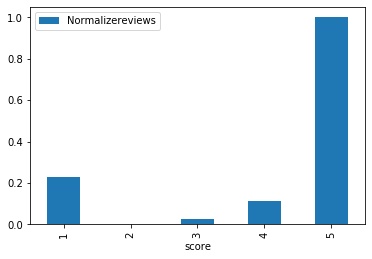

In [153]:
Normalize["score"] = Normalize.index
Normalize.plot.bar(x="score",y="Normalizereviews")


###### 13. What is the average length of the reviews in each score-sub-group?

In [224]:
AvgLength = JoinedDf.copy()
AvgLength ["AverageLen"]= JoinedDf["text"].str.len()


In [225]:
AvgLengthTable = pd.DataFrame(AvgLength.groupby("score")["AverageLen"].mean())

In [226]:
AvgLengthTable

,AverageLen
score,
1,106.373693
2,130.655311
3,96.387765
4,64.645532
5,37.552502


##### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [254]:
AvgLength

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText,AverageLen
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN,4
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN,12
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable,52
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN,8
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass,33
...,...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN,6
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN,7
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son,86
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN,13


In [228]:
AvgPlot = pd.DataFrame(AvgLength.groupby(["CATEGORY",'score'])['AverageLen'].mean())

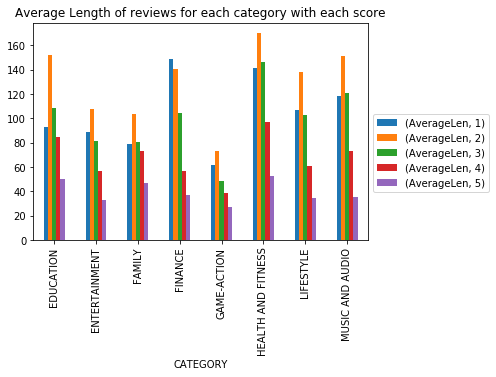

In [247]:
AvgPlot.unstack().plot(kind="bar",title="Average Length of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 15. Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [250]:
AvgReview = pd.DataFrame(AvgLength.groupby(["CATEGORY","score"])["text"].count())

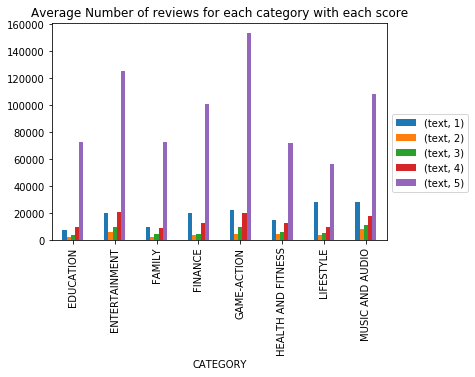

In [251]:
AvgReview.unstack().plot(kind="bar",title="Average Number of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 16. Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).

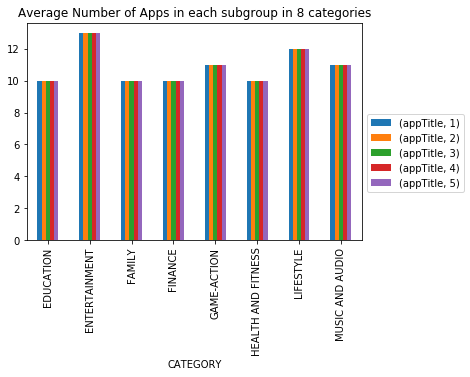

In [252]:
AverageApp = pd.DataFrame(AvgLength.groupby(['CATEGORY',"score"])['appTitle'].nunique())
AverageApp.unstack().plot(kind="bar",title="Average Number of Apps in each subgroup in 8 categories")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 17. Is there any correlation between the length of the reviews and the score in each app-category?

In [260]:
RevScore = AvgLength.groupby("CATEGORY")[["score","AverageLen"]].apply(lambda x:x.corr()["AverageLen"])
RevScore.iloc[:,[0]]



AverageLen,score
CATEGORY,
EDUCATION,-0.212736
ENTERTAINMENT,-0.301022
FAMILY,-0.159834
FINANCE,-0.457667
GAME-ACTION,-0.216247
HEALTH AND FITNESS,-0.349930
LIFESTYLE,-0.362638
MUSIC AND AUDIO,-0.401597


###### There is negative correlation between the average Length and the score

###### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.
###### a. Can we use the date column for this question?
###### b. If not, what is the solution based on the data you have?

In [11]:
detailsRegex = re.compile(r'newest')
i = 0
columns = range(1,100)
df2files=[]
df2List=[]



for root, dirs, files in os.walk(cd):
    for fname in files:
        if detailsRegex.search(fname):
            frame = pd.read_csv(os.path.join(root, fname), names=columns,skiprows=1)
            if fname.find("EDUCATION") != -1:
                frame['CATEGORY'] = "EDUCATION"
            elif fname.find("FINANCE") !=-1:
                frame['CATEGORY'] = "FINANCE"  
            elif fname.find("ENTERTAINMENT") != -1:
                frame['CATEGORY'] = "ENTERTAINMENT"
            elif fname.find("FAMILY") != -1:
                frame['CATEGORY'] = "FAMILY"
            elif fname.find("GAME") != -1:
                frame['CATEGORY'] = "GAME-ACTION"
            elif fname.find("HEALTH") != -1:
                frame['CATEGORY'] = "HEALTH AND FITNESS"
            elif fname.find("LIFESTYLE") != -1:
                frame['CATEGORY'] = "LIFESTYLE"
            elif fname.find("MUSIC") != -1:
                frame['CATEGORY'] = "MUSIC AND AUDIO"
            frame['month'] = fname[5:7]
            
            #frame['key'] = "file{}".format(i)
            df2List.append(frame)    
            df2files.append(fname)
            i += 1
            
            


In [12]:
df2 = pd.concat(df2List)

In [13]:
df2.reset_index(drop=True,inplace=True)
df2.rename(columns={1:"appTitle",2:"userName",3:"date",4:"score",5:"text"},inplace=True)
df2.dropna(axis=1,how="all",inplace=True)
df2['appTitle'] = df2['appTitle'].str.lower()
df2.drop_duplicates(subset=['appTitle','userName','date','score','text'],inplace=True)





In [14]:
df2.dropna(subset=['appTitle','text'],inplace=True)
df2

,appTitle,userName,date,score,text,CATEGORY,month
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,03
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,03
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,03
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,03
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,03
...,...,...,...,...,...,...,...
2715298,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,05
2715299,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,05
2715300,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,05
2715301,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,05


##### 1)Drop duplicates and record how many unique reviews are collected?

###### Recording of unique number of reviews is done after dropping duplicates which have similar app Title,UserName,score,text and Category and then again dropping duplicates that have the same apptitle and review 

In [19]:
len(df.text.unique())

673592

Total number of unique reviews is 673592

###### 2. How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?

In [51]:
print("Number of unique apps are",len(df['appTitle'].unique()))
print("Apps in each of the 8 specified app categories are")
df.groupby("CATEGORY")['appTitle'].nunique()

Number of unique apps are 86
Apps in each of the 8 specified app categories are


CATEGORY
EDUCATION             10
ENTERTAINMENT         13
FAMILY                10
FINANCE               10
GAME-ACTION           11
HEALTH AND FITNESS    10
LIFESTYLE             12
MUSIC AND AUDIO       11
Name: appTitle, dtype: int64

##### 3. How many reviews exist in each of the eight app-categories?

In [56]:
df.groupby("CATEGORY")['text'].count()

CATEGORY
EDUCATION              95830
ENTERTAINMENT         181303
FAMILY                 98783
FINANCE               141129
GAME-ACTION           209493
HEALTH AND FITNESS    109859
LIFESTYLE             102928
MUSIC AND AUDIO       172973
Name: text, dtype: int64

###### 4. Based on the contentRating column in the details files for each app, what are the different contentRating groups in each app-category?
###### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?


In [22]:
pd.DataFrame(detailsDf.groupby("CATEGORY")["contentRating"].unique())
detailsDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone         60
ENTERTAINMENT       Everyone          6
                    Mature 17+        6
                    Teen             48
FAMILY              Everyone         40
                    Everyone 10+     18
FINANCE             Everyone         60
                    contentRating     1
GAME-ACTION         Everyone         30
                    Mature 17+        6
                    Teen             24
HEALTH AND FITNESS  Everyone         60
LIFESTYLE           Everyone         52
                    Mature 17+        6
                    Teen              1
MUSIC AND AUDIO     Everyone         12
                    Teen             48
Name: contentRating, dtype: int64

In [57]:
JoinedDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone          95830
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             159648
FAMILY              Everyone          50676
                    Everyone 10+      48107
FINANCE             Everyone         141129
GAME-ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH AND FITNESS  Everyone         109859
LIFESTYLE           Everyone          78200
                    Mature 17+        21716
                    Teen               3012
MUSIC AND AUDIO     Everyone          22754
                    Teen             150219
Name: contentRating, dtype: int64

##### 6. How many reviews in each contentRating-sub-groups in each app-category?

In [61]:
JoinedDf.groupby(["CATEGORY","contentRating"])["text"].count()

CATEGORY            contentRating
EDUCATION           Everyone          95830
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             159648
FAMILY              Everyone          50676
                    Everyone 10+      48107
FINANCE             Everyone         141129
GAME-ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH AND FITNESS  Everyone         109859
LIFESTYLE           Everyone          78200
                    Mature 17+        21716
                    Teen               3012
MUSIC AND AUDIO     Everyone          22754
                    Teen             150219
Name: text, dtype: int64

In [37]:
import nltk

nltk.download('words')
words = set(nltk.corpus.words.words())


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\shahi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [38]:
def review(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha()))


In [64]:
JoinedDf["processedText"] = JoinedDf["text"]
JoinedDf["processedText"] = JoinedDf["processedText"].astype(str)
JoinedDf["processedText"] = JoinedDf["processedText"].apply(review)

In [65]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,nice
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,very helpful
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great . Detailed . Understandable .
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,great !!!
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,..... time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,it gay
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,Love it
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,love this


#### Remove non ascii characters

In [66]:
JoinedDf.processedText.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

#### Remove punctuations

In [67]:
JoinedDf["processedText"] = JoinedDf['processedText'].str.replace('[^\w\s]','',)

##### Remove multiple characters if they occur more than two times continuously

In [68]:
def removeMultiple(text):
    return re.sub(r'([a-z])\1{2,}', r'\1\1', text)
JoinedDf['processedText']= JoinedDf['processedText'].map(removeMultiple)

In [69]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,nice
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,very helpful
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,great
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,it gay
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,Love it
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,love this


###### 7. Should we remove the reviews that contain two or less number of words?
A) We should not remove reviews that contain two more words. In case sentiment analysis needs to be carried , a two word review such as, "Great APP" is meaningful about the app and gives the true sentiment of that review. Hence taking away such reviews would just loose make us loose out on meaningful data that could be used for analysis.

B)Removing reviews just based on the score would not be recommended. This would cause the the eventual model to be biased.

###### Remove reviews that have less than two words

In [70]:
def moreThanTwoWords(text):
    if len(text.split(" ")) > 2:
        return text
    return np.nan

In [71]:
JoinedDf["processedText"] = JoinedDf["processedText"].apply(moreThanTwoWords)

In [72]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN


###### 8. How many reviews exist in each of the eight app-categories? Compare with question 3.

In [73]:
print("The number of Unique reviews after processing the text is ",len(JoinedDf["processedText"].unique()),
      "and before text processing is",len(JoinedDf["text"].unique()))

The number of Unique reviews after processing the text is  557295 and before text processing is 673592


In [74]:
len(JoinedDf["text"].unique())

673592

In [75]:
JoinedDf.groupby("CATEGORY")["processedText"].count()

CATEGORY
EDUCATION              69249
ENTERTAINMENT         106245
FAMILY                 68407
FINANCE                97385
GAME-ACTION           116521
HEALTH AND FITNESS     78660
LIFESTYLE              68021
MUSIC AND AUDIO       115976
Name: processedText, dtype: int64

In [76]:
pd.concat([df.groupby("CATEGORY")['text'].count(),JoinedDf.groupby("CATEGORY")["processedText"].count()],axis=1)

,text,processedText
CATEGORY,,
EDUCATION,95830,69249
ENTERTAINMENT,181303,106245
FAMILY,98783,68407
FINANCE,141129,97385
GAME-ACTION,209493,116521
HEALTH AND FITNESS,109859,78660
LIFESTYLE,102928,68021
MUSIC AND AUDIO,172973,115976


###### 9. How many reviews in each contentRating-sub-groups in each app-category? Compare with question 6.

In [77]:
pd.concat([JoinedDf.groupby(["CATEGORY","contentRating"])["text"].count(),JoinedDf.groupby(["CATEGORY","contentRating"])["processedText"].count()],axis=1)

text  processedText
CATEGORY           contentRating                       
EDUCATION          Everyone        95830          69249
ENTERTAINMENT      Everyone        14377          10334
                   Mature 17+       7278           4954
                   Teen           159648          90957
FAMILY             Everyone        50676          31699
                   Everyone 10+    48107          36708
FINANCE            Everyone       141129          97385
GAME-ACTION        Everyone        87560          55242
                   Mature 17+      29359          12400
                   Teen            92574          48879
HEALTH AND FITNESS Everyone       109859          78660
LIFESTYLE          Everyone        78200          51615
                   Mature 17+      21716          14300
                   Teen             3012           2106
MUSIC AND AUDIO    Everyone        22754          15861
                   Teen           150219         100115

##### Analyzing each category

##### 10. What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.

###### Before text processing

In [78]:
JoinedDf.groupby("score")["text"].count()

score
1    150522
2     35107
3     53878
4    111020
5    761771
Name: text, dtype: int64

##### After text processing

In [79]:
JoinedDf.groupby("score")["processedText"].count()

score
1    125982
2     30494
3     41520
4     76890
5    445578
Name: processedText, dtype: int64

###### 11. How many apps exist in each score-sub-group?

In [80]:
JoinedDf.groupby("score")["appTitle"].nunique()

score
1    86
2    86
3    86
4    86
5    86
Name: appTitle, dtype: int64

###### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

In [81]:
JoinedDf

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass
...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN


In [82]:
Normalize = pd.DataFrame(JoinedDf.groupby("score")["processedText"].count())

In [83]:
Normalize.columns = ["Number of Reviews for processed text"]
Normalize

,Number of Reviews for processed text
score,
1,125982
2,30494
3,41520
4,76890
5,445578


In [84]:
## Normalize using mix max data


Normalize["Normalizereviews"]= (Normalize["Number of Reviews for processed text"]-Normalize["Number of Reviews for processed text"].min())/(Normalize["Number of Reviews for processed text"].max()-Normalize["Number of Reviews for processed text"].min())
Normalize

,Number of Reviews for processed text,Normalizereviews
score,,
1,125982,0.230045
2,30494,0.000000
3,41520,0.026563
4,76890,0.111775
5,445578,1.000000


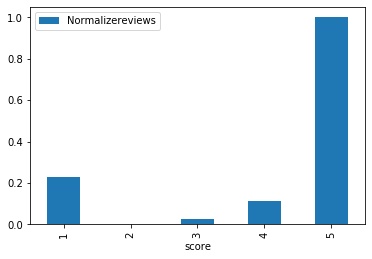

In [119]:
Normalize["score"] = Normalize.index
Normalize.plot.bar(x="score",y="Normalizereviews")


###### 13. What is the average length of the reviews in each score-sub-group?

In [86]:
AvgLength = JoinedDf.copy()
AvgLength ["AverageLen"]= JoinedDf["text"].str.len()


In [87]:
AvgLengthTable = pd.DataFrame(AvgLength.groupby("score")["AverageLen"].mean())

In [88]:
AvgLengthTable

,AverageLen
score,
1,106.373693
2,130.655311
3,96.387765
4,64.645532
5,37.552502


##### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [89]:
AvgLength

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText,AverageLen
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN,4
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN,12
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable,52
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN,8
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass,33
...,...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN,6
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN,7
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son,86
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN,13


In [90]:
AvgPlot = pd.DataFrame(AvgLength.groupby(["CATEGORY",'score'])['AverageLen'].mean())

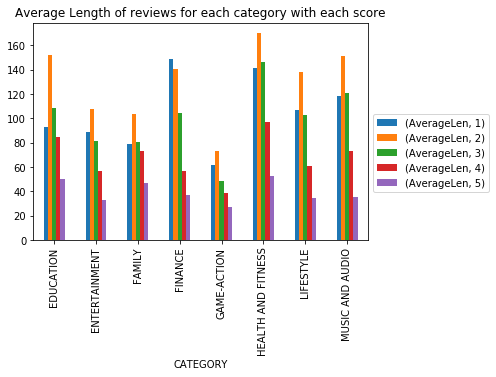

In [91]:
AvgPlot.unstack().plot(kind="bar",title="Average Length of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 15. Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [92]:
AvgReview = pd.DataFrame(AvgLength.groupby(["CATEGORY","score"])["text"].count())

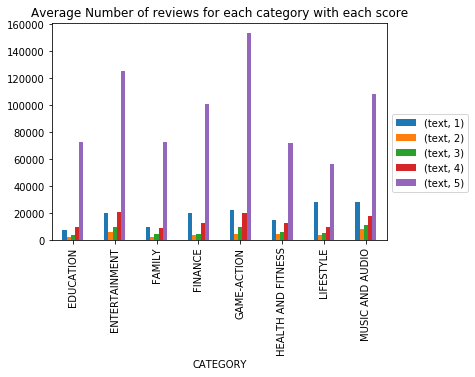

In [93]:
AvgReview.unstack().plot(kind="bar",title="Average Number of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 16. Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).

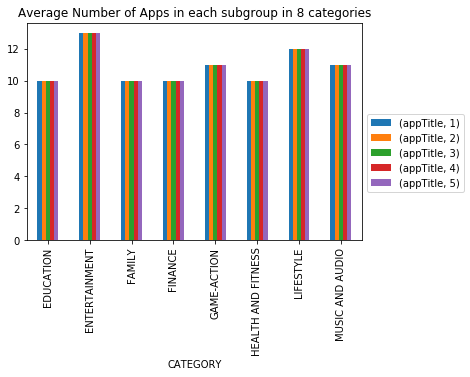

In [94]:
AverageApp = pd.DataFrame(AvgLength.groupby(['CATEGORY',"score"])['appTitle'].nunique())
AverageApp.unstack().plot(kind="bar",title="Average Number of Apps in each subgroup in 8 categories")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 17. Is there any correlation between the length of the reviews and the score in each app-category?

In [95]:
RevScore = AvgLength.groupby("CATEGORY")[["score","AverageLen"]].apply(lambda x:x.corr()["AverageLen"])
RevScore.iloc[:,[0]]



AverageLen,score
CATEGORY,
EDUCATION,-0.212736
ENTERTAINMENT,-0.301022
FAMILY,-0.159834
FINANCE,-0.457667
GAME-ACTION,-0.216247
HEALTH AND FITNESS,-0.349930
LIFESTYLE,-0.362638
MUSIC AND AUDIO,-0.401597


###### There is negative correlation between the average Length and the score

###### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.
###### a. Can we use the date column for this question?
###### b. If not, what is the solution based on the data you have?

In [96]:
detailsRegex = re.compile(r'newest')
i = 0
columns = range(1,100)
df2files=[]
df2List=[]



for root, dirs, files in os.walk(cd):
    for fname in files:
        if detailsRegex.search(fname):
            frame = pd.read_csv(os.path.join(root, fname), names=columns,skiprows=1)
            if fname.find("EDUCATION") != -1:
                frame['CATEGORY'] = "EDUCATION"
            elif fname.find("FINANCE") !=-1:
                frame['CATEGORY'] = "FINANCE"  
            elif fname.find("ENTERTAINMENT") != -1:
                frame['CATEGORY'] = "ENTERTAINMENT"
            elif fname.find("FAMILY") != -1:
                frame['CATEGORY'] = "FAMILY"
            elif fname.find("GAME") != -1:
                frame['CATEGORY'] = "GAME-ACTION"
            elif fname.find("HEALTH") != -1:
                frame['CATEGORY'] = "HEALTH AND FITNESS"
            elif fname.find("LIFESTYLE") != -1:
                frame['CATEGORY'] = "LIFESTYLE"
            elif fname.find("MUSIC") != -1:
                frame['CATEGORY'] = "MUSIC AND AUDIO"
            frame['month'] = fname[5:7]
            
            #frame['key'] = "file{}".format(i)
            df2List.append(frame)    
            df2files.append(fname)
            i += 1
            
            


In [97]:
df2 = pd.concat(df2List)

In [98]:
df2.reset_index(drop=True,inplace=True)
df2.rename(columns={1:"appTitle",2:"userName",3:"date",4:"score",5:"text"},inplace=True)
df2.dropna(axis=1,how="all",inplace=True)
df2['appTitle'] = df2['appTitle'].str.lower()
df2.drop_duplicates(subset=['appTitle','userName','date','score','text'],inplace=True)





In [99]:
df2.dropna(subset=['appTitle','text'],inplace=True)
df2

,appTitle,userName,date,score,text,CATEGORY,month
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,03
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,03
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,03
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,03
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,03
...,...,...,...,...,...,...,...
2715298,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,05
2715299,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,05
2715300,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,05
2715301,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,05


In [100]:
months = list(df2['month'])

In [102]:
AvgLength['month']=months

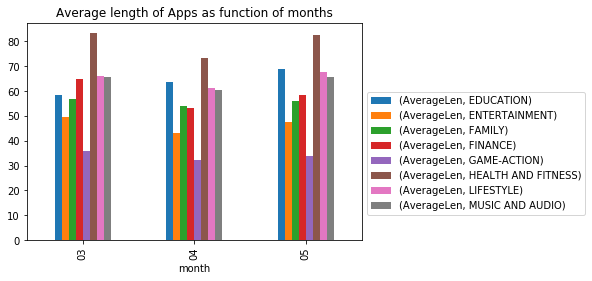

In [104]:
monthPlot = pd.DataFrame(AvgLength.groupby(['month','CATEGORY'])['AverageLen'].mean())
monthPlot.unstack().plot(kind="bar",title="Average length of Apps as function of months")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

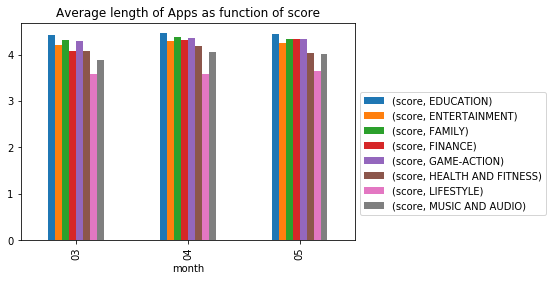

In [105]:
monthPlot = pd.DataFrame(AvgLength.groupby(['month','CATEGORY'])['score'].mean())
monthPlot.unstack().plot(kind="bar",title="Average length of Apps as function of score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

## RESULT COLUMN

##### 1)Drop duplicates and record how many unique reviews are collected?

###### Recording of unique number of reviews is done after dropping duplicates which have similar app Title,UserName,score,text and Category and then again dropping duplicates that have the same apptitle and review 

In [106]:
len(df.text.unique())

673592

Total number of unique reviews is 673592

###### 2. How many unique apps are in the dataset? How many apps in each of the 8 specified app categories?

In [107]:
print("Number of unique apps are",len(df['appTitle'].unique()))
print("Apps in each of the 8 specified app categories are")
df.groupby("CATEGORY")['appTitle'].nunique()

Number of unique apps are 86
Apps in each of the 8 specified app categories are


CATEGORY
EDUCATION             10
ENTERTAINMENT         13
FAMILY                10
FINANCE               10
GAME-ACTION           11
HEALTH AND FITNESS    10
LIFESTYLE             12
MUSIC AND AUDIO       11
Name: appTitle, dtype: int64

##### 3. How many reviews exist in each of the eight app-categories?

In [108]:
df.groupby("CATEGORY")['text'].count()

CATEGORY
EDUCATION              95830
ENTERTAINMENT         181303
FAMILY                 98783
FINANCE               141129
GAME-ACTION           209493
HEALTH AND FITNESS    109859
LIFESTYLE             102928
MUSIC AND AUDIO       172973
Name: text, dtype: int64

###### 4. Based on the contentRating column in the details files for each app, what are the different contentRating groups in each app-category?
###### 5. How many apps exist in each of these contentRating-sub-groups in each app-category?


In [109]:
pd.DataFrame(detailsDf.groupby("CATEGORY")["contentRating"].unique())
detailsDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone         60
                    developer        18
ENTERTAINMENT       Everyone          6
                    Mature 17+        6
                    Teen             48
                    developer        18
FAMILY              Everyone         40
                    Everyone 10+     18
                    developer        18
FINANCE             Everyone         60
                    contentRating     1
                    developer        18
GAME-ACTION         Everyone         30
                    Mature 17+        6
                    Teen             24
                    developer        18
HEALTH AND FITNESS  Everyone         60
                    developer        18
LIFESTYLE           Everyone         52
                    Mature 17+        6
                    Teen              1
                    developer        16
MUSIC AND AUDIO     Everyone         12
                    Teen             48
      

In [57]:
JoinedDf.groupby(["CATEGORY","contentRating"])["contentRating"].count()

CATEGORY            contentRating
EDUCATION           Everyone          95830
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             159648
FAMILY              Everyone          50676
                    Everyone 10+      48107
FINANCE             Everyone         141129
GAME-ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH AND FITNESS  Everyone         109859
LIFESTYLE           Everyone          78200
                    Mature 17+        21716
                    Teen               3012
MUSIC AND AUDIO     Everyone          22754
                    Teen             150219
Name: contentRating, dtype: int64

##### 6. How many reviews in each contentRating-sub-groups in each app-category?

In [110]:
JoinedDf.groupby(["CATEGORY","contentRating"])["text"].count()

CATEGORY            contentRating
EDUCATION           Everyone          95830
ENTERTAINMENT       Everyone          14377
                    Mature 17+         7278
                    Teen             159648
FAMILY              Everyone          50676
                    Everyone 10+      48107
FINANCE             Everyone         141129
GAME-ACTION         Everyone          87560
                    Mature 17+        29359
                    Teen              92574
HEALTH AND FITNESS  Everyone         109859
LIFESTYLE           Everyone          78200
                    Mature 17+        21716
                    Teen               3012
MUSIC AND AUDIO     Everyone          22754
                    Teen             150219
Name: text, dtype: int64

#### Remove non ascii characters

In [66]:
JoinedDf.processedText.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

#### Remove punctuations

In [67]:
JoinedDf["processedText"] = JoinedDf['processedText'].str.replace('[^\w\s]','',)

##### Remove multiple characters if they occur more than two times continuously

In [68]:
def removeMultiple(text):
    return re.sub(r'([a-z])\1{2,}', r'\1\1', text)
JoinedDf['processedText']= JoinedDf['processedText'].map(removeMultiple)

###### 7. Should we remove the reviews that contain two or less number of words?
A) We should not remove reviews that contain two more words. In case sentiment analysis needs to be carried , a two word review such as, "Great APP" is meaningful about the app and gives the true sentiment of that review. Hence taking away such reviews would just loose make us loose out on meaningful data that could be used for analysis.

B)Removing reviews just based on the score would not be recommended. This would cause the the eventual model to be biased.

###### Remove reviews that have less than two words

In [70]:
def moreThanTwoWords(text):
    if len(text.split(" ")) > 2:
        return text
    return np.nan

In [71]:
JoinedDf["processedText"] = JoinedDf["processedText"].apply(moreThanTwoWords)

###### 8. How many reviews exist in each of the eight app-categories? Compare with question 3.

In [111]:
print("The number of Unique reviews after processing the text is ",len(JoinedDf["processedText"].unique()),
      "and before text processing is",len(JoinedDf["text"].unique()))

The number of Unique reviews after processing the text is  557295 and before text processing is 673592


In [112]:
len(JoinedDf["text"].unique())

673592

In [114]:
pd.concat([df.groupby("CATEGORY")['text'].count(),JoinedDf.groupby("CATEGORY")["processedText"].count()],axis=1)

,text,processedText
CATEGORY,,
EDUCATION,95830,69249
ENTERTAINMENT,181303,106245
FAMILY,98783,68407
FINANCE,141129,97385
GAME-ACTION,209493,116521
HEALTH AND FITNESS,109859,78660
LIFESTYLE,102928,68021
MUSIC AND AUDIO,172973,115976


###### 9. How many reviews in each contentRating-sub-groups in each app-category? Compare with question 6.

In [77]:
pd.concat([JoinedDf.groupby(["CATEGORY","contentRating"])["text"].count(),JoinedDf.groupby(["CATEGORY","contentRating"])["processedText"].count()],axis=1)

text  processedText
CATEGORY           contentRating                       
EDUCATION          Everyone        95830          69249
ENTERTAINMENT      Everyone        14377          10334
                   Mature 17+       7278           4954
                   Teen           159648          90957
FAMILY             Everyone        50676          31699
                   Everyone 10+    48107          36708
FINANCE            Everyone       141129          97385
GAME-ACTION        Everyone        87560          55242
                   Mature 17+      29359          12400
                   Teen            92574          48879
HEALTH AND FITNESS Everyone       109859          78660
LIFESTYLE          Everyone        78200          51615
                   Mature 17+      21716          14300
                   Teen             3012           2106
MUSIC AND AUDIO    Everyone        22754          15861
                   Teen           150219         100115

##### Analyzing each category

##### 10. What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.

###### Before text processing

In [115]:
JoinedDf.groupby("score")["text"].count()

score
1    150522
2     35107
3     53878
4    111020
5    761771
Name: text, dtype: int64

##### After text processing

In [116]:
JoinedDf.groupby("score")["processedText"].count()

score
1    125982
2     30494
3     41520
4     76890
5    445578
Name: processedText, dtype: int64

###### 11. How many apps exist in each score-sub-group?

In [117]:
JoinedDf.groupby("score")["appTitle"].nunique()

score
1    86
2    86
3    86
4    86
5    86
Name: appTitle, dtype: int64

###### 12. Compare the number of reviews for each score in a plot (Remember to normalize the numbers when you are comparing them).

In [121]:
## Normalize using mix max data


Normalize["Normalizereviews"]= (Normalize["Number of Reviews for processed text"]-Normalize["Number of Reviews for processed text"].min())/(Normalize["Number of Reviews for processed text"].max()-Normalize["Number of Reviews for processed text"].min())
Normalize

,Number of Reviews for processed text,Normalizereviews,score
score,,,
1,125982,0.230045,1
2,30494,0.000000,2
3,41520,0.026563,3
4,76890,0.111775,4
5,445578,1.000000,5


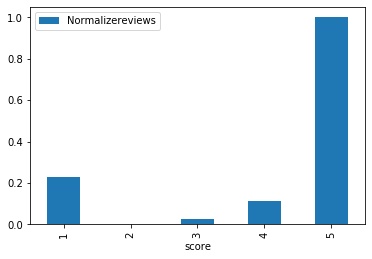

In [122]:
Normalize["score"] = Normalize.index
Normalize.plot.bar(x="score",y="Normalizereviews")


###### 13. What is the average length of the reviews in each score-sub-group?

In [123]:
AvgLength = JoinedDf.copy()
AvgLength ["AverageLen"]= JoinedDf["text"].str.len()


In [124]:
AvgLengthTable = pd.DataFrame(AvgLength.groupby("score")["AverageLen"].mean())

In [125]:
AvgLengthTable

,AverageLen
score,
1,106.373693
2,130.655311
3,96.387765
4,64.645532
5,37.552502


##### 14. Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [126]:
AvgLength

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText,AverageLen
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN,4
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN,12
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable,52
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN,8
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass,33
...,...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN,6
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN,7
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son,86
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN,13


In [127]:
AvgPlot = pd.DataFrame(AvgLength.groupby(["CATEGORY",'score'])['AverageLen'].mean())

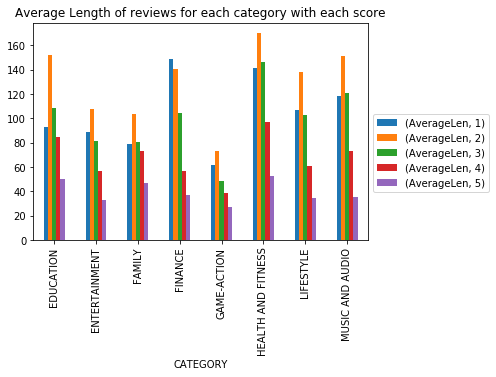

In [128]:
AvgPlot.unstack().plot(kind="bar",title="Average Length of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 15. Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).

In [129]:
AvgReview = pd.DataFrame(AvgLength.groupby(["CATEGORY","score"])["text"].count())

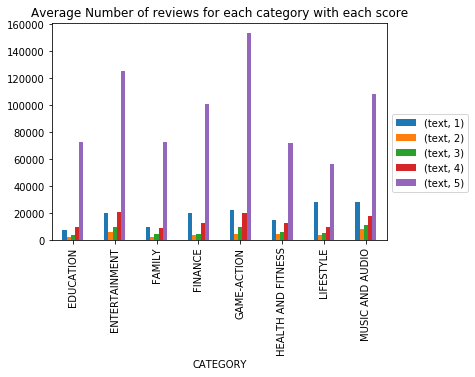

In [130]:
AvgReview.unstack().plot(kind="bar",title="Average Number of reviews for each category with each score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 16. Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).

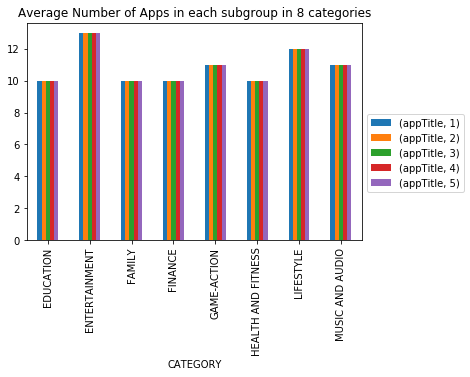

In [131]:
AverageApp = pd.DataFrame(AvgLength.groupby(['CATEGORY',"score"])['appTitle'].nunique())
AverageApp.unstack().plot(kind="bar",title="Average Number of Apps in each subgroup in 8 categories")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

###### 17. Is there any correlation between the length of the reviews and the score in each app-category?

In [132]:
RevScore = AvgLength.groupby("CATEGORY")[["score","AverageLen"]].apply(lambda x:x.corr()["AverageLen"])
RevScore.iloc[:,[0]]



AverageLen,score
CATEGORY,
EDUCATION,-0.212736
ENTERTAINMENT,-0.301022
FAMILY,-0.159834
FINANCE,-0.457667
GAME-ACTION,-0.216247
HEALTH AND FITNESS,-0.349930
LIFESTYLE,-0.362638
MUSIC AND AUDIO,-0.401597


###### There is negative correlation between the average Length and the score

###### 18. Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.
###### a. Can we use the date column for this question?
###### b. If not, what is the solution based on the data you have?

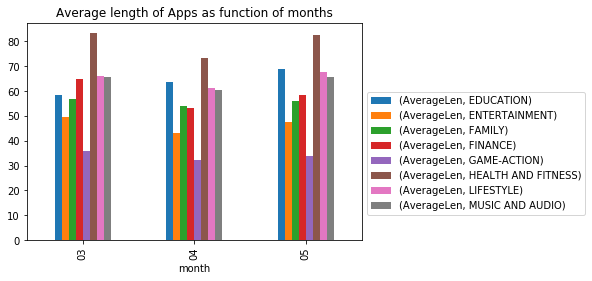

In [139]:
monthPlot = pd.DataFrame(AvgLength.groupby(['month','CATEGORY'])['AverageLen'].mean())
monthPlot.unstack().plot(kind="bar",title="Average length of Apps as function of months")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

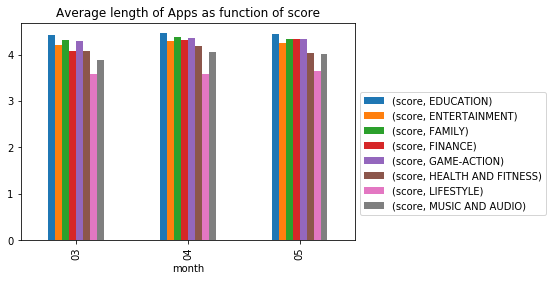

In [140]:
monthPlot = pd.DataFrame(AvgLength.groupby(['month','CATEGORY'])['score'].mean())
monthPlot.unstack().plot(kind="bar",title="Average length of Apps as function of score")
plt.legend(loc="center left",bbox_to_anchor=(1,0.4))

In [143]:
AvgLength

,appTitle,userName,date,score,text,CATEGORY,contentRating,processedText,AverageLen,month
0,photomath,NaN,"March 8, 2019",5,nice,EDUCATION,Everyone,NaN,4,03
1,photomath,NaN,"March 8, 2019",4,very helpful,EDUCATION,Everyone,NaN,12,03
2,photomath,NaN,"March 8, 2019",5,Great App. Detailed answers. Understandable an...,EDUCATION,Everyone,Great Detailed Understandable,52,03
3,photomath,NaN,"March 8, 2019",5,great!!!,EDUCATION,Everyone,NaN,8,03
4,photomath,NaN,"March 8, 2019",1,bakwas hai pura.....time pass hai,EDUCATION,Everyone,time pass,33,03
...,...,...,...,...,...,...,...,...,...,...
1112293,soundcloud - music & audio,pubgmaster 25,"May 3, 2019",1,it gay,MUSIC AND AUDIO,Teen,NaN,6,05
1112294,soundcloud - music & audio,Anjita Sinha,"May 3, 2019",4,Love it,MUSIC AND AUDIO,Teen,NaN,7,05
1112295,soundcloud - music & audio,Luis Lucas,"May 3, 2019",5,muy bueno me gusta y puedo aguardar la musica ...,MUSIC AND AUDIO,Teen,me y la me mix son,86,05
1112296,soundcloud - music & audio,Teairo Keys,"May 3, 2019",5,love this app,MUSIC AND AUDIO,Teen,NaN,13,05


In [145]:
AvgLength.dropna(subset=['processedText'],inplace=True)

In [147]:
cleanedDataFrame = AvgLength

In [149]:
cleanedDataFrame.to_csv("CleanedDataFrame.csv")